In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk # machine learning library

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

C:\Users\guy\Documents\GitHub\STAT303_GROUP\ucimlrepo\fetch.py:100: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
ids = diabetes_130_us_hospitals_for_years_1999_2008.data.ids
data = diabetes_130_us_hospitals_for_years_1999_2008.data.features

data = data.join(ids)

data["readmitted"] = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

data = data.drop_duplicates(subset=["patient_nbr"], keep='first')

data = data.loc[data.gender!="Unknown/Invalid",:]

data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,encounter_id,patient_nbr,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,2278392,8222157,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,No,No,No,Ch,Yes,149190,55629189,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,Yes,64410,86047875,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,Ch,Yes,500364,82442376,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,No,No,No,Ch,Yes,16680,42519267,NO


In [5]:
# num_cols = list(["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"])

# from sklearn.preprocessing import MinMaxScaler

# # create the scaler function
# scaler = MinMaxScaler()

# scaled_data = scaler.fit_transform(data.loc[:,num_cols])
# data_new = pd.DataFrame(scaled_data)
# data_new.columns=num_cols

In [6]:
data.head()

data.describe()

count_values1 = data['num_procedures'].value_counts()
count_values2 = data['race'].value_counts()
count_values3 = data['gender'].value_counts()
count_values4 = data['readmitted'].value_counts()

print(count_values1)
print(count_values2)
print(count_values3)
print(count_values4)

0    31430
1    14302
2     9149
3     7183
6     3956
4     3056
5     2439
Name: num_procedures, dtype: int64
Caucasian          53491
AfricanAmerican    12887
Hispanic            1517
Other               1177
Asian                497
Name: race, dtype: int64
Female    38025
Male      33490
Name: gender, dtype: int64
NO     42982
>30    22240
<30     6293
Name: readmitted, dtype: int64


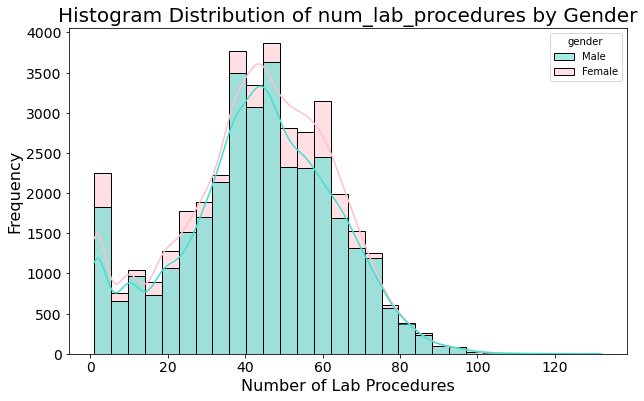

In [7]:
# Set a custom color palette
custom_palette = {'Male': 'turquoise', 'Female': 'pink', 'Unknown/Invalid': 'gray'}

# Create a histogram with customized colors and ordering
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x='num_lab_procedures', hue='gender', bins=30, kde=True, palette=custom_palette, hue_order=['Male', 'Female'])

# Set titles and labels with increased text size
plt.title('Histogram Distribution of num_lab_procedures by Gender', fontsize=20)
plt.xlabel('Number of Lab Procedures', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Increase the font size of the ticks on both axes
histplot.tick_params(axis='both', labelsize=14)



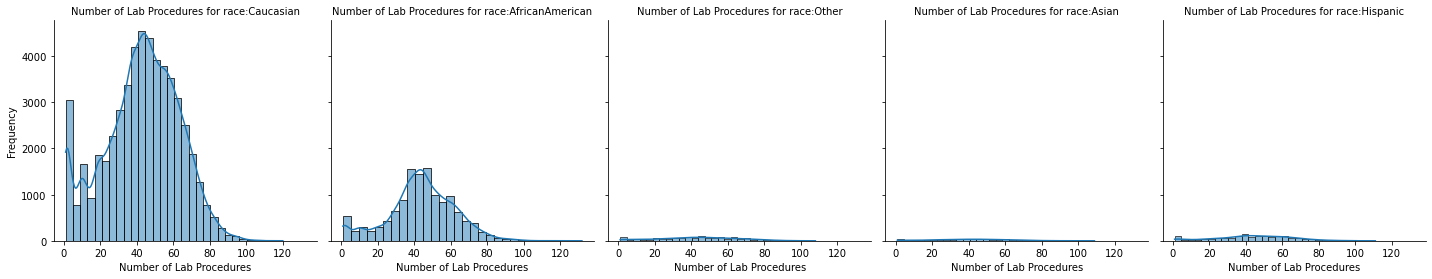

In [8]:
# Create a FacetGrid with 'race' as the column variable
g = sns.FacetGrid(data, col='race', height=4, col_wrap=5)

# Map the histogram on the grid for each race
g.map(sns.histplot, 'num_lab_procedures', bins=30, kde=True)

# Set titles and labels
g.set_titles('Number of Lab Procedures for race:{col_name}')
g.set_axis_labels('Number of Lab Procedures', 'Frequency')

# Show the plot
plt.show()

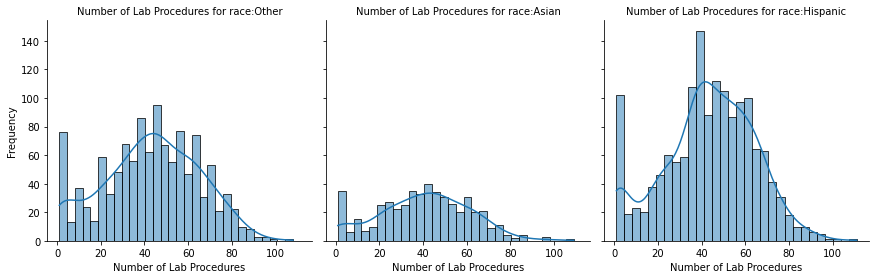

In [9]:
# Exclude rows with race "Caucasian"
filtered_data = data[(data['race'] != 'Caucasian') & (data['race'] != 'AfricanAmerican')]

# Create a FacetGrid with 'race' as the column variable, col_wrap=5 to display 5 plots in each row
g = sns.FacetGrid(filtered_data, col='race', height=4, col_wrap=5)

# Map the histogram on the grid for each race
g.map(sns.histplot, 'num_lab_procedures', bins=30, kde=True)

# Set titles and labels
g.set_titles('Number of Lab Procedures for race:{col_name}')
g.set_axis_labels('Number of Lab Procedures', 'Frequency')

# Show the plot
plt.show()

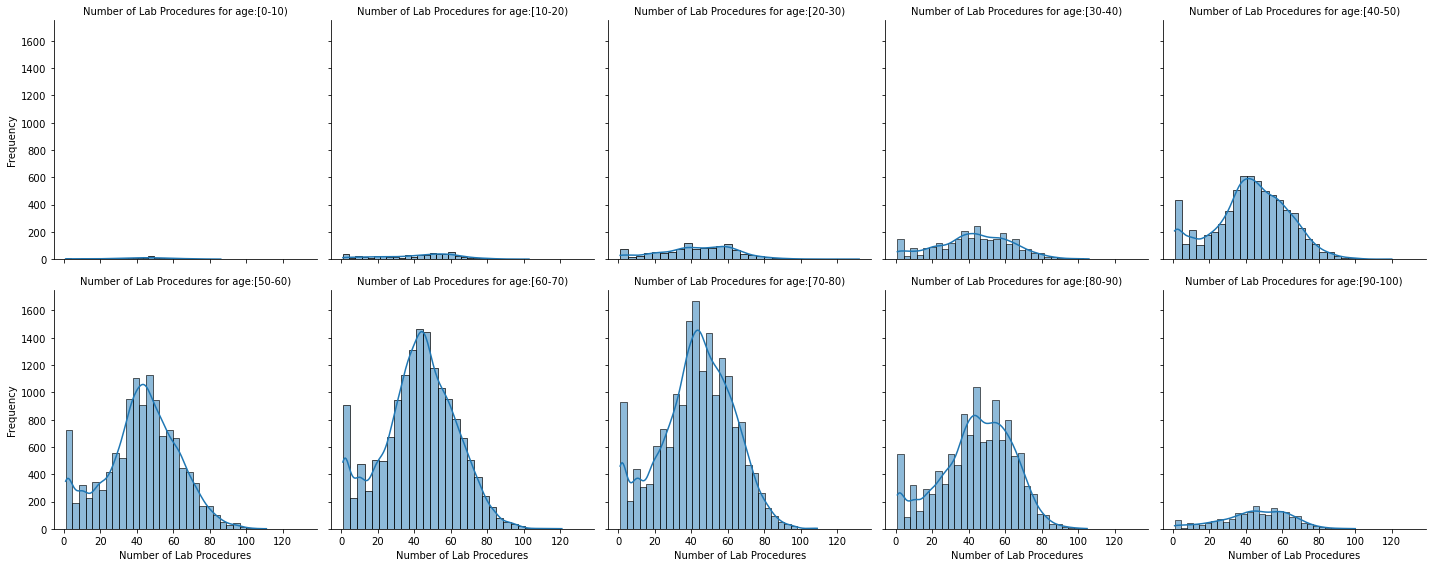

In [10]:
# Create a FacetGrid with 'race' as the column variable
g = sns.FacetGrid(data, col='age', height=4, col_wrap=5)

# Map the histogram on the grid for each race
g.map(sns.histplot, 'num_lab_procedures', bins=30, kde=True)

# Set titles and labels
g.set_titles('Number of Lab Procedures for age:{col_name}')
g.set_axis_labels('Number of Lab Procedures', 'Frequency')

# Show the plot
plt.show()

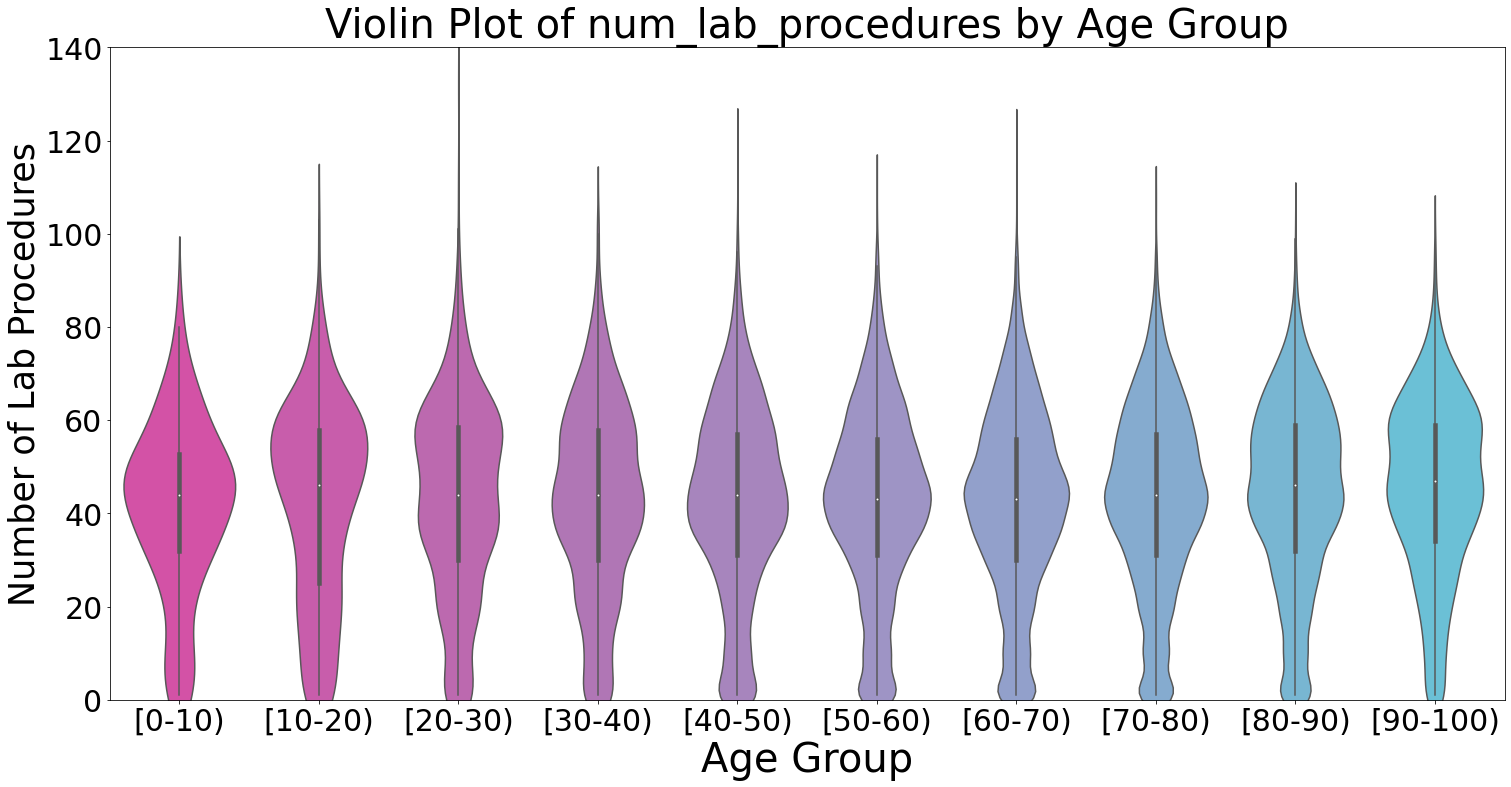

In [11]:
# Create a violin plot
plt.figure(figsize=(25, 12))
ax = sns.violinplot(x='age', y='num_lab_procedures', data=data, palette='blend:#E93CAC,#59CBE8', edgecolor='white')

# Set titles and labels with increased text size
ax.set_title('Violin Plot of num_lab_procedures by Age Group', fontsize=40)
ax.set_xlabel('Age Group', fontsize=40)
ax.set_ylabel('Number of Lab Procedures', fontsize=35)

# Increase the font size of the ticks on both axes
ax.tick_params(axis='both', which='both', labelsize=30)

# Set y-axis limit
ax.set_ylim(0, 140)  # Adjust the limit according to your preference


# Show the plot
plt.show()

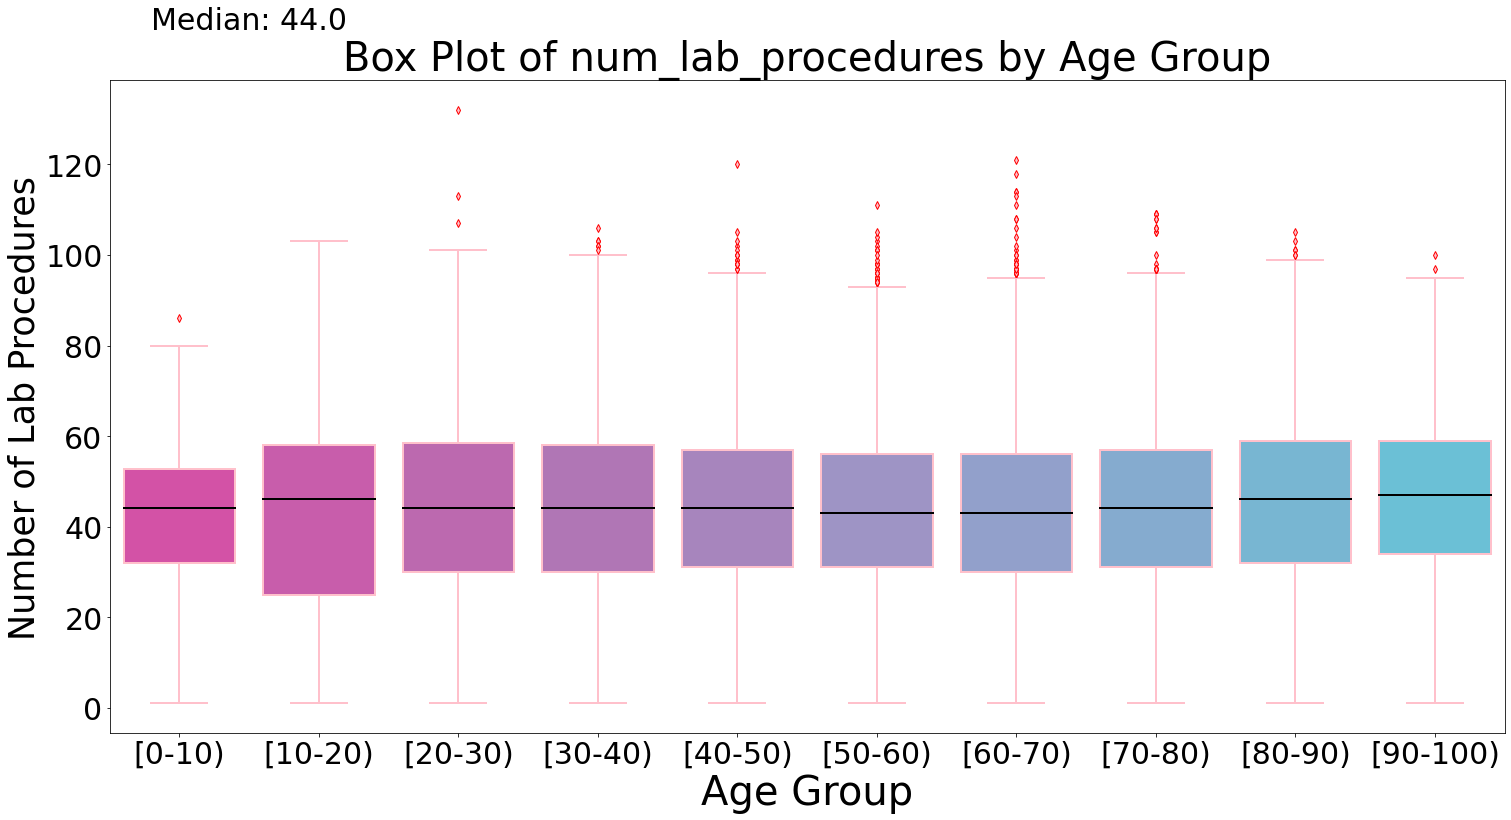

In [12]:
# Set the figure size
plt.figure(figsize=(25, 12))

# Create a boxplot
ax = sns.boxplot(x='age', y='num_lab_procedures', data=data, palette='blend:#E93CAC,#59CBE8',
                 boxprops={'edgecolor': 'pink', 'linewidth': 2},
                 whiskerprops={'color': 'pink', 'linewidth': 2},
                 capprops={'color': 'pink', 'linewidth': 2},
                 flierprops={'markerfacecolor': 'pink', 'markeredgecolor': 'red'},
                 medianprops={'color': 'black', 'linewidth': 2},
                 )

# Set titles and labels
plt.title('Box Plot of num_lab_procedures by Age Group', fontsize=40)
plt.xlabel('Age Group', fontsize=40)
plt.ylabel('Number of Lab Procedures', fontsize=35)
ax.tick_params(axis='both', which='both', labelsize=30)

# Calculate the median
median_value = data['num_lab_procedures'].median()

# Add the median annotation to the plot
ax.text(0.5, ax.get_ylim()[1] + 10, f'Median: {median_value}', ha='center', va='bottom', fontsize=30)

# Show the plot
plt.show()

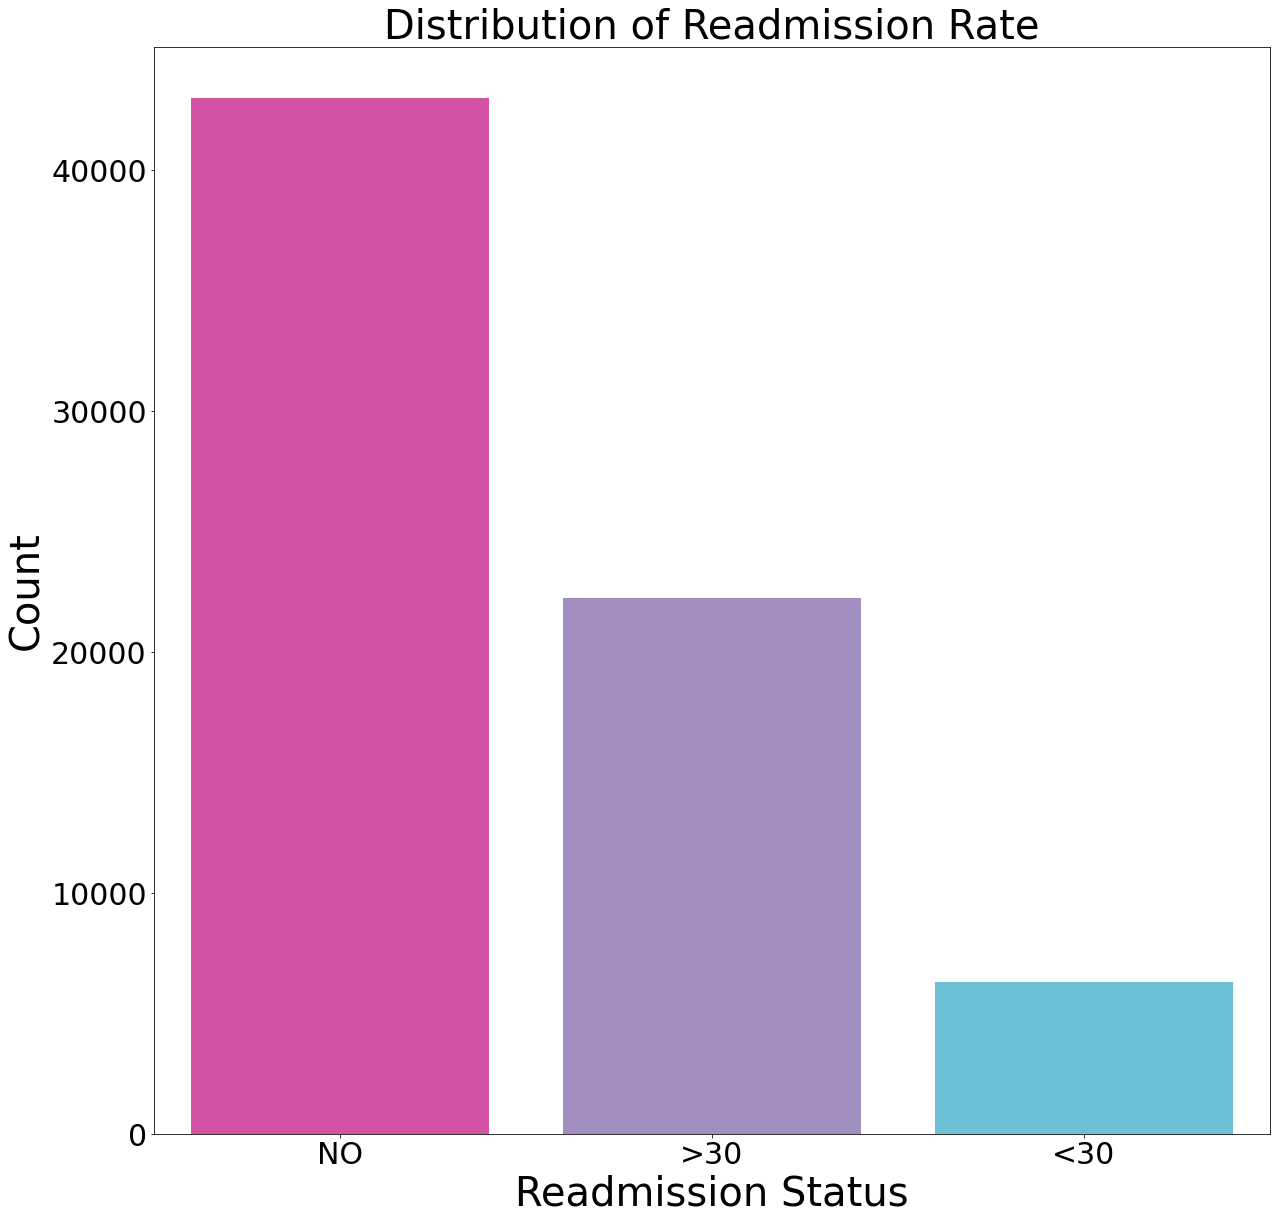

In [42]:
# Create a countplot for the 'readmitted' column
plt.figure(figsize=(20, 20))
sns.countplot(x='readmitted', data=data, palette='blend:#E93CAC,#59CBE8')

# Set titles and labels
plt.title('Distribution of Readmission Rate',fontsize=40)
plt.xlabel('Readmission Status',fontsize=40)
plt.ylabel('Count',fontsize=40)

plt.tick_params(axis='both', which='both', labelsize=30)


plt.show()

C:\Users\guy\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


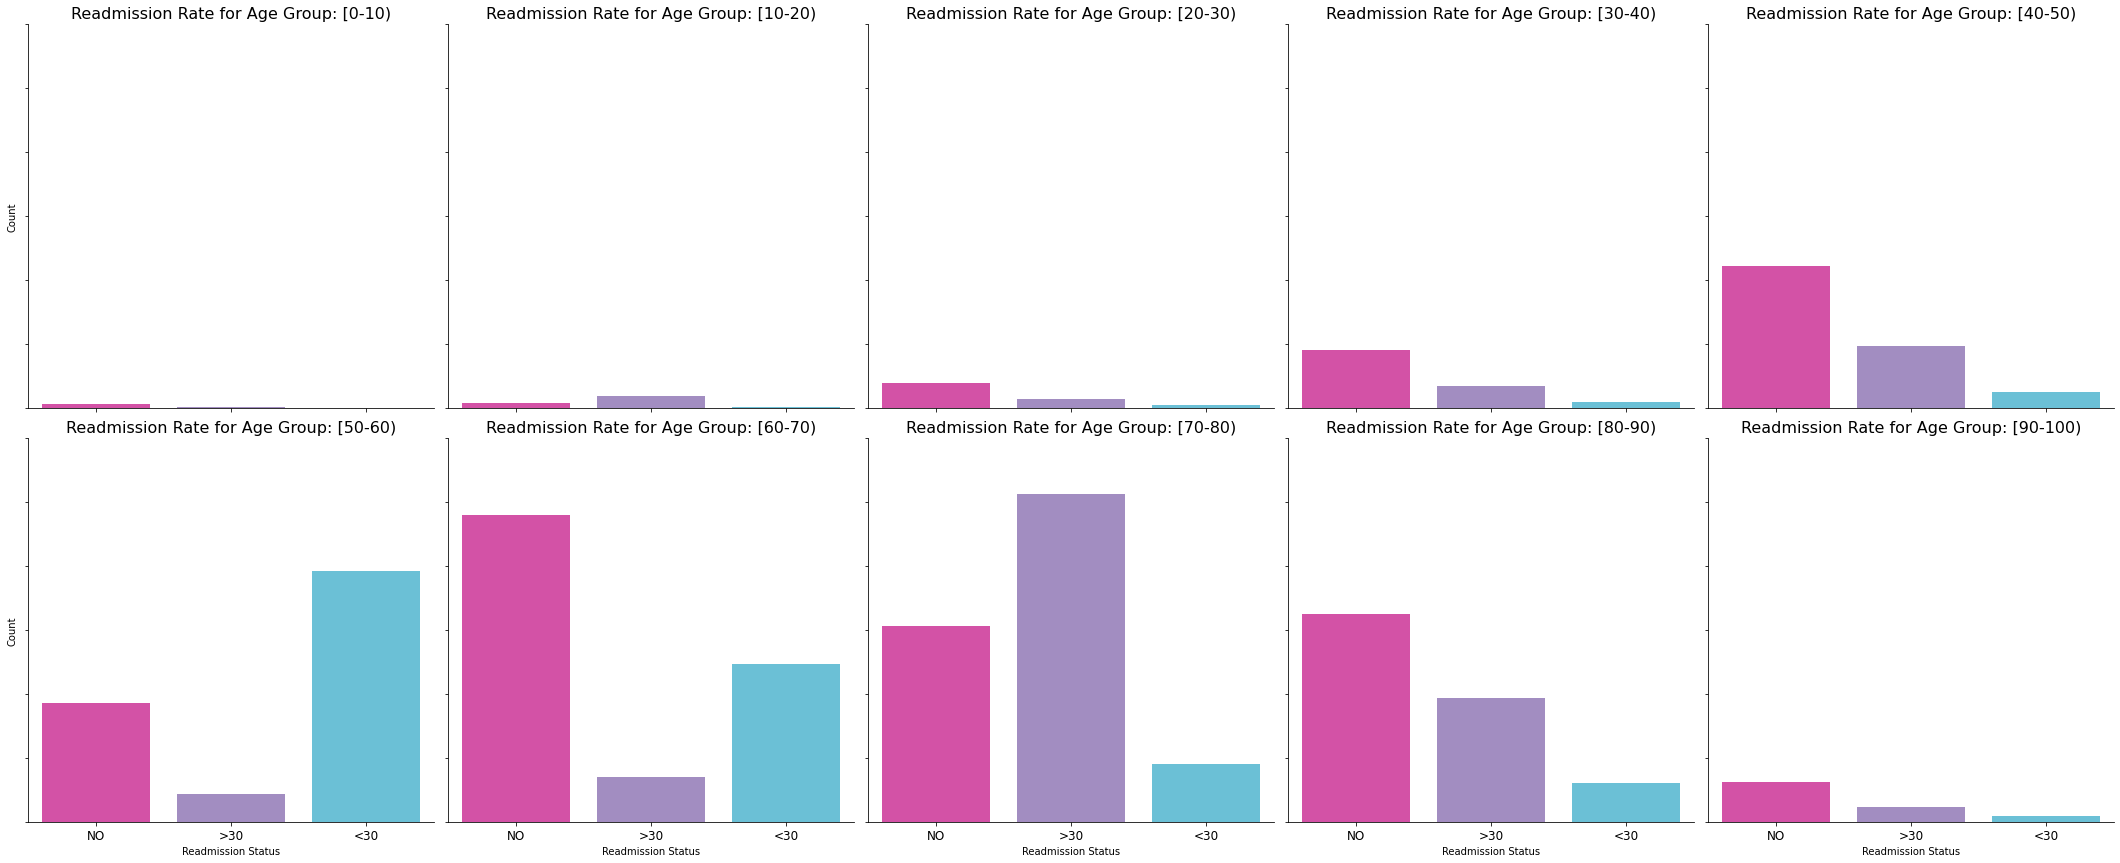

In [45]:
# Create a FacetGrid with 'age' as the column variable
g = sns.FacetGrid(data, col='age', col_wrap=5, height=6)

# Map the countplot on the grid for each age group
g.map(sns.countplot, 'readmitted', palette='blend:#E93CAC,#59CBE8')

# Set titles and labels for the entire grid
g.set_titles('Readmission Rate for Age Group: {col_name}')
g.set_axis_labels('Readmission Status', 'Count')

# Set tick parameters for the entire grid
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Set individual titles for each subplot
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=16)

# mplcyberpunk.make_lines_glow(alpha_line=0.5)
plt.show()

3080570

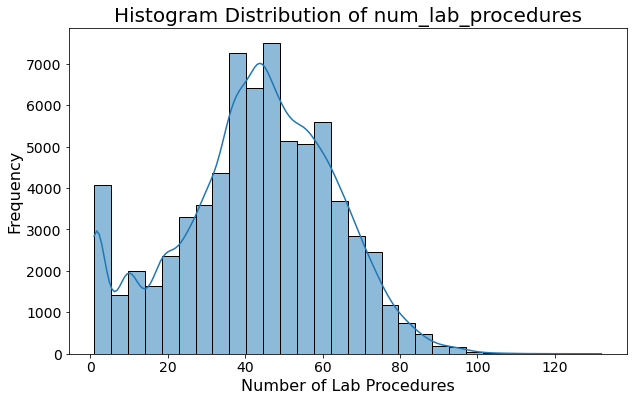

In [9]:

plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=data, x='num_lab_procedures',  bins=30, kde=True)

# Set titles and labels with increased text size
plt.title('Histogram Distribution of num_lab_procedures', fontsize=20)
plt.xlabel('Number of Lab Procedures', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Increase the font size of the ticks on both axes
histplot.tick_params(axis='both', labelsize=14)


data['num_lab_procedures'].sum()